<a href="https://colab.research.google.com/github/leoGCoelho/Fake-News-no-MS/blob/main/MSDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

#### 1) Installing Dependences

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chro

#### 2) Importing Libraries and Collections

In [ ]:
import re
import time
import requests
import pandas as pd
import collections
import matplotlib.pyplot as plt

from google.colab import drive
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from numpy import nan

# Web Scrapping and Collecting Comparative Data

#### 1) Catch HTML Content Ministerio da Saúde's Site and Start to Build a Dataset

###### 1.1) Webdriver Settings

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('window-size=1920x1080')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


###### 1.2) Crawling *saude.gor.br/fakenews*

In [ ]:
url_ministerio = 'https://www.saude.gov.br/fakenews'
url_ministerio_paged = 'https://www.saude.gov.br/fakenews?start='

driver.get(url_ministerio)
time.sleep(5)

element = driver.find_element_by_xpath('//*[@id="adminForm"]/div[2]')
ministerio_content = element.get_attribute('outerHTML')

index = 10
for i in range(2,23):
    aux_url = url_ministerio_paged + str(index)
    driver.get(aux_url)
    time.sleep(5)

    element = driver.find_element_by_xpath('//*[@id="adminForm"]/div[2]')
    ministerio_content = ministerio_content + element.get_attribute('outerHTML')
    index += 10


#print(ministerio_content)

driver.quit()

###### 1.3) Crawling Inside Every Link To Get Text Data

In [ ]:
def GetTextMS(url):
    texts = ''
    driver2 =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

    driver2.get('https://antigo.saude.gov.br' + str(url))
    time.sleep(5)

    element = driver2.find_element_by_xpath('//*[@id="content-section"]/div[2]/div[1]')
    text_content = element.get_attribute('outerHTML')

    text_doctoralia = BeautifulSoup(text_content, 'html.parser')
    data = text_doctoralia.find_all('p')

    for text in data:
        texts += text.getText()
        texts += '\n\n'

    #print(ministerio_content)

    driver2.quit()
    return texts

#### 2) Building the Dataset

Considera-se, no campo de validação, <strong>1</strong> se a mensagem for verdadeira e <strong>-1 </strong>se for falsa.

In [ ]:
soup_doctoralia = BeautifulSoup(ministerio_content, 'html.parser')

titles = []
texts = []
links = []
validations = []
check = True

texts_data = soup_doctoralia.find_all('h2', class_="tileHeadline")

for item in texts_data:
    name = re.sub(r'\n', r'', item.getText())
    #name = re.sub(r' - É FAKE NEWS!', r'', name)
    if(re.search('É FAKE NEWS(.+)', name) or re.search('FAKE NEWS', name) or re.search('FAKE NEWS!', name)):
        validations.append(-1)
        name = re.sub(r' - (.+)', r'.', name)
        check = True
    elif(re.search('É VERDADE(.+)', name) or re.search('VERDADE', name) or re.search('VERDADE!', name)):
        validations.append(1)
        name = re.sub(r' - (.+)', r'.', name)
        check = True
    else:
        check = False

    if (check):
        titles.append(name)

        site = item.find_all('a')
        for link in site:
            texts.append( GetTextMS(link['href']) )
            links.append(link['href'])


s0 = pd.Series(titles, name='Title')
s1 = pd.Series(texts, name='Text')
s2 = pd.Series(links, name='Link')
s3 = pd.Series(validations, name='Validation')
df_ministerio = pd.concat([s0,s1,s2,s3], axis=1)

drive.mount('/gdrive')
%cd /gdrive
filepath = r'/gdrive/My Drive/PLN/Data/tweepy/'
df_ministerio.to_excel(filepath + 'MSDataset.xlsx')
df_ministerio.to_csv(filepath + 'MSDataset.xlsx')


df_ministerio

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


,Title,Text,Link,Validation
0,Declaração ministro Pazuello sobre atestados d...,\n\nO Ministério da Saúde informa que a referi...,/fakenews/47028-declaracao-ministro-pazuello-s...,-1
1,Mensagem do Pazuello no Twitter sobre Polícia ...,\n\nAtenção! O Ministério da Saúde informa que...,/fakenews/46973-mensagem-do-pazuello-no-twitte...,-1
2,Vacina da gripe aumenta risco de adoecer por c...,\n\nO Não compartilhe esse conteúdo. Ele conté...,/fakenews/46967-vacina-da-gripe-aumenta-risco-...,-1
3,Máscaras sem qualidade distribuídas pelo Minis...,\n\nO Ministério da Saúde preza pela segurança...,/fakenews/46779-mascaras-sem-qualidade-distrib...,-1
4,Software das UPAS obrigam registro de coronaví...,"\n\nEssa mensagem é falsa, não compartilhe!\n\...",/fakenews/46778-software-das-upas-obrigam-regi...,-1
...,...,...,...,...
209,Cura do diabetes com cápsula natural.,\n\nEste site é falso e a mensagem também! Por...,/fakenews/44322-cura-do-diabetes-com-capsula-n...,-1
210,"""Peste Negra"" ameaça voltar à Paraíba.",\n\nO Brasil não registra casos de peste human...,/fakenews/44289-peste-negra-ameaca-voltar-a-pa...,-1
211,Vacinas obrigatórias.,\n\nEsse portal profere bastante inverdades a ...,/fakenews/44248-vacinas-obrigatorias-o-que-ha-...,-1
212,Coletes de agentes endêmicos de controle da de...,\n\nOlá! Essa mensagem é falsa. Não a comparti...,/fakenews/44237-coletes-de-agentes-endemicos-d...,-1


###### 3) Plotando Gráfico

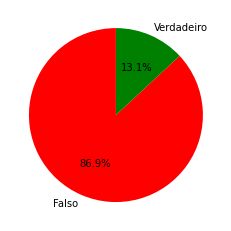

[(-1, 186), (1, 28)]

In [ ]:
validation_freq = collections.Counter(df_ministerio['Validation'])
labels = ['Falso', 'Verdadeiro']
colors = ['r','g']

plt.pie(validation_freq.values(), labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

validation_freq.most_common()

In [ ]:
words = []

for text in df_ministerio.Text:
    for word in str(text).split():
        print(word)
        words.append(word)

print(len(words))

A saída de streaming foi truncada nas últimas 5000 linhas.
texto
que
circula
nas
redes
sociais,
sobre
as
10
razões
pelas
quais
não
deveria
vacinar
seu
filho
é
cheio
de
inverdades
e
com
informações
sem
fundamentação
científica.*
O
Ministério
da
Saúde
esclarece
que
todas
as
vacinas
ofertadas
pelo
Programa
Nacional
de
Imunizações
são
seguras,
possuem
os
devidos
registros
na
Agência
Nacional
de
Vigilância
Sanitária
(Anvisa)
e
passam
por
um
rígido
processo
de
avaliação
de
qualidade
pelo
Instituto
Nacional
de
Controle
de
Qualidade
em
Saúde
(INCQS)
da
Fundação
Oswaldo
Cruz.
A
vacinação
é
de
extrema
importância
para
evitar
doenças
e
suas
sequelas
(como
surdez,
cegueira,
paralisia,
problemas
neurológicos,
dentre
outros)
e
consequentemente
a
morte,
proporcionando
qualidade
de
vida
para
toda
a
população,
além
de
evitar
que
doenças
se
propaguem.
Eventos
adversos
graves
após
a
vacinação
são
muito
raros
e
cuidadosamente
monitorados
e
investigados
por
meio
do
Sistema
de
Vigilância
de
Eventos
Adversos